In [67]:
#!pip install pandas
#!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv('/content/diabetes.csv')

In [69]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [72]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


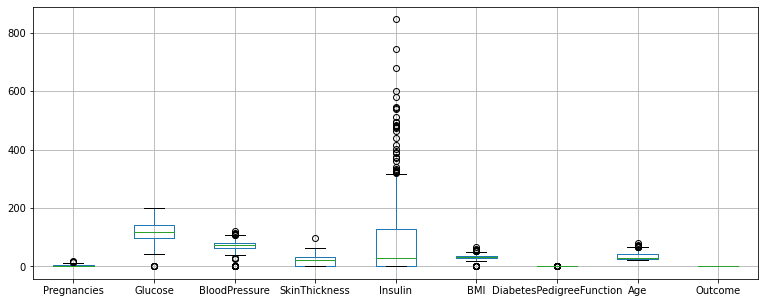

In [75]:
df.boxplot(figsize=(13,5))
plt.show()

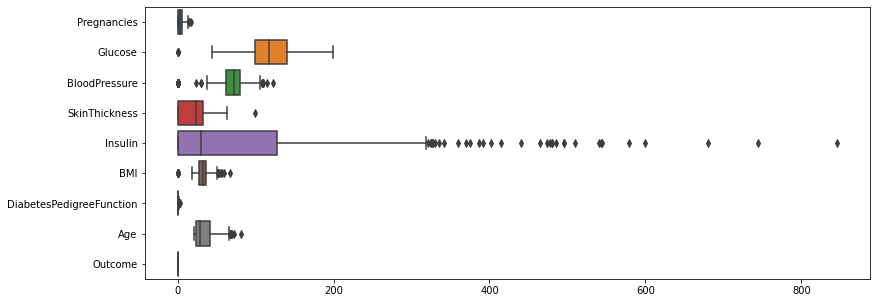

In [76]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

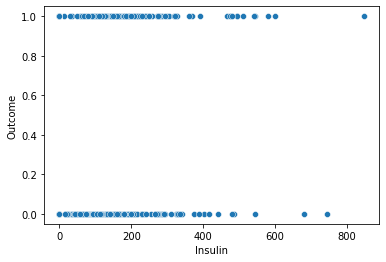

In [77]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

# Replacing 0 with Mean with respective columns

In [78]:
X=df.drop('Outcome',axis=1)

In [79]:
Y=df['Outcome']

In [80]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [81]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [82]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


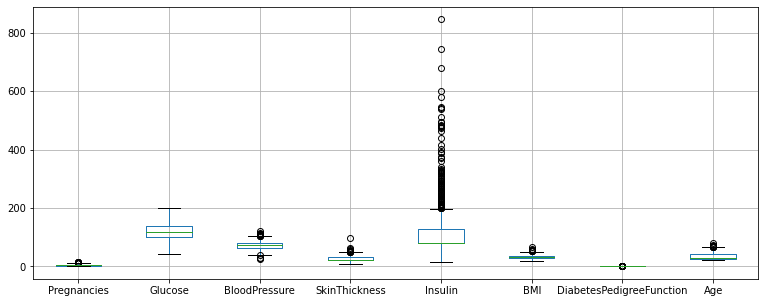

In [83]:
X.boxplot(figsize=(13,5))
plt.show()

# Splitting of data for training and testing

In [84]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(Y)

In [85]:
from sklearn.model_selection import train_test_split
X_train_80, X_test_80, Y_train_80, Y_test_80=train_test_split(X,yt,test_size=0.2,random_state=10)
X_train_70, X_test_70, Y_train_70, Y_test_70=train_test_split(X,yt,test_size=0.3,random_state=10)

In [86]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std80=std.fit_transform(X_train_80)
X_test_std80=std.transform(X_test_80)
X_train_std70=std.fit_transform(X_train_70)
X_test_std70=std.transform(X_test_70)


In [103]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
dt = DecisionTreeClassifier(random_state = 100,max_depth=3, min_samples_leaf=5)

In [104]:
dt.fit(X_train_std80,Y_train_80)
dt.fit(X_train_std70,Y_train_70)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [105]:
Y_pred_dt80=dt.predict(X_test_std80)
Y_pred_dt70=dt.predict(X_test_std70)


In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
ac_dt80=accuracy_score(Y_test_80,Y_pred_dt80)*100
ac_dt70=accuracy_score(Y_test_70,Y_pred_dt70)*100

In [107]:
cr_dt80=classification_report(Y_test_80,Y_pred_dt80)
cr_dt70=classification_report(Y_test_70,Y_pred_dt70)


In [108]:
print(cr_dt80)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        95
           1       0.78      0.36      0.49        59

    accuracy                           0.71       154
   macro avg       0.74      0.65      0.65       154
weighted avg       0.73      0.71      0.68       154



In [109]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB


In [110]:
classifier_NB = GaussianNB()
classifier_NB.fit(X_train_std80,Y_train_80)
classifier_NB.fit(X_train_std70,Y_train_70)

GaussianNB()

In [111]:
Y_pred_NB80=classifier_NB.predict(X_test_std80)
Y_pred_NB70=classifier_NB.predict(X_test_std70)

In [112]:
ac_NB80=accuracy_score(Y_test_80,Y_pred_NB80)*100
ac_NB70=accuracy_score(Y_test_70,Y_pred_NB70)*100

In [113]:
cr_NB80=classification_report(Y_test_80,Y_pred_NB80)
cr_NB70=classification_report(Y_test_70,Y_pred_NB70)
print(cr_NB80)

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        95
           1       0.70      0.51      0.59        59

    accuracy                           0.73       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



In [114]:
#svm
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_80)
X_train_80 = scaling.transform(X_train_80)
X_test_80 = scaling.transform(X_test_80)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_70)
X_train_70 = scaling.transform(X_train_70)
X_test_70 = scaling.transform(X_test_70)

In [116]:
from sklearn.svm import SVC
svc = SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train_80, Y_train_80)
svc.fit(X_train_70, Y_train_70)

SVC(C=0.1, gamma=1, kernel='linear')

In [117]:
Y_pred_SV80=svc.predict(X_test_80)
Y_pred_SV70=svc.predict(X_test_70)

In [118]:
ac_SV80=accuracy_score(Y_test_80,Y_pred_SV80)*100
ac_SV70=accuracy_score(Y_test_70,Y_pred_SV70)*100

In [119]:
cr_SV80=classification_report(Y_test_80,Y_pred_SV80)
cr_SV70=classification_report(Y_test_70,Y_pred_SV70)
print(cr_SV80)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        95
           1       0.74      0.39      0.51        59

    accuracy                           0.71       154
   macro avg       0.72      0.65      0.65       154
weighted avg       0.72      0.71      0.69       154



In [120]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [121]:
precision_DT80=precision_score(Y_test_80,Y_pred_dt80,average='weighted')
precision_NB80=precision_score(Y_test_80,Y_pred_NB80,average='weighted')
precision_SV80=precision_score(Y_test_80,Y_pred_SV80,average='weighted')

In [122]:
recall_DT80=recall_score(Y_test_80,Y_pred_dt80,average='weighted')
recall_NB80=recall_score(Y_test_80,Y_pred_NB80,average='weighted')
recall_SV80=recall_score(Y_test_80,Y_pred_SV80,average='weighted')

In [123]:
f1_DT80=f1_score(Y_test_80,Y_pred_dt80,average='weighted')
f1_NB80=f1_score(Y_test_80,Y_pred_NB80,average='weighted')
f1_SV80=f1_score(Y_test_80,Y_pred_SV80,average='weighted')

In [124]:
precision_DT70=precision_score(Y_test_70,Y_pred_dt70,average='weighted')
precision_NB70=precision_score(Y_test_70,Y_pred_NB70,average='weighted')
precision_SV70=precision_score(Y_test_70,Y_pred_SV70,average='weighted')

In [125]:
recall_DT70=recall_score(Y_test_70,Y_pred_dt70,average='weighted')
recall_NB70=recall_score(Y_test_70,Y_pred_NB70,average='weighted')
recall_SV70=recall_score(Y_test_70,Y_pred_SV70,average='weighted')

In [126]:
f1_DT70=f1_score(Y_test_70,Y_pred_dt70,average='weighted')
f1_NB70=f1_score(Y_test_70,Y_pred_NB70,average='weighted')
f1_SV70=f1_score(Y_test_70,Y_pred_SV70,average='weighted')

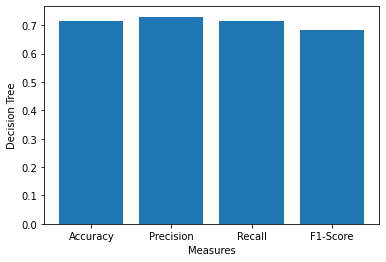

In [127]:
plt.bar(['Accuracy','Precision','Recall','F1-Score'],[ac_dt80/100,precision_DT80,recall_DT80,f1_DT80])
plt.ylabel("Decision Tree")
plt.xlabel("Measures")
plt.show()

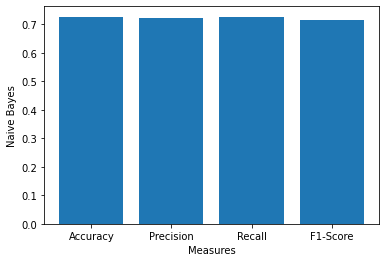

In [128]:
plt.bar(['Accuracy','Precision','Recall','F1-Score'],[ac_NB80/100,precision_NB80,recall_NB80,f1_NB80])
plt.ylabel("Naive Bayes")
plt.xlabel("Measures")
plt.show()

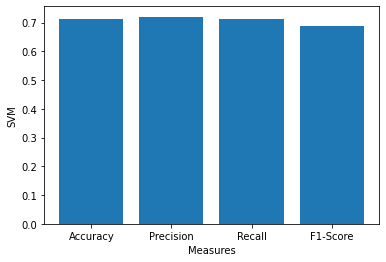

In [130]:
plt.bar(['Accuracy','Precision','Recall','F1-Score'],[ac_SV80/100,precision_SV80,recall_SV80,f1_SV80])
plt.ylabel("SVM")
plt.xlabel("Measures")
plt.show()

Text(0, 0.5, 'Accurracy')

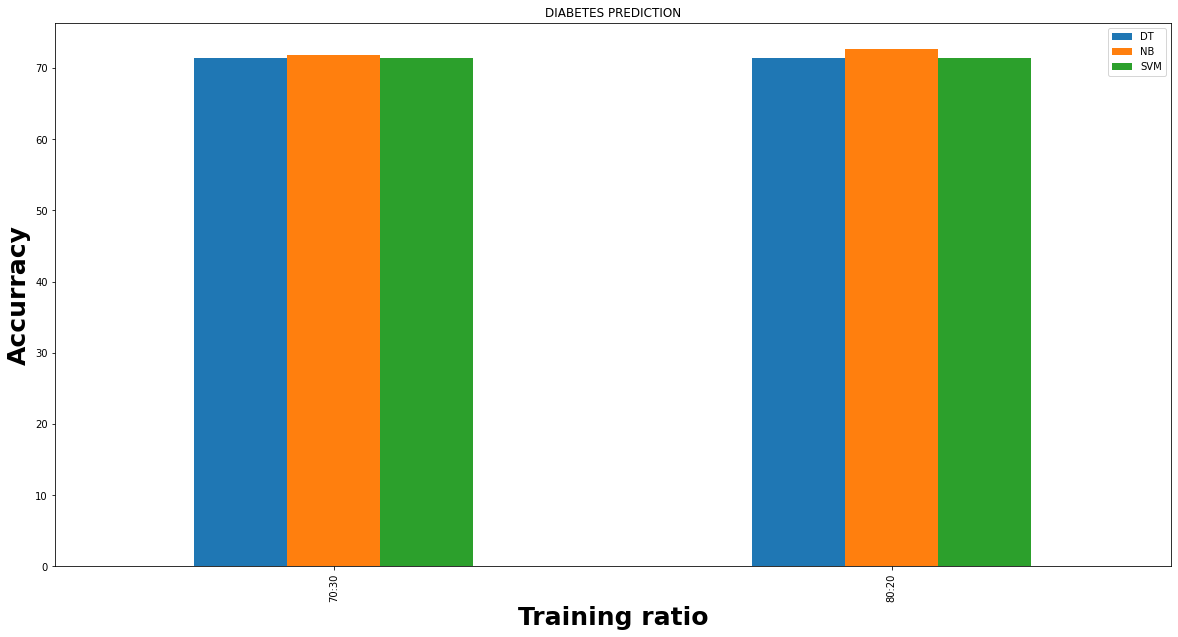

In [139]:
plotdata = pd.DataFrame({

    "DT":[ac_dt70,ac_dt80],

    "NB":[ac_NB70,ac_NB80],
    
    "SVM":[ac_SV70,ac_SV80]},

    index=["70:30", "80:20"])

plotdata.plot(kind="bar",figsize=(20, 10))

plt.title("DIABETES PREDICTION")

plt.xlabel('Training ratio', fontweight ='bold', fontsize = 25)
plt.ylabel('Accurracy', fontweight ='bold', fontsize = 25)
